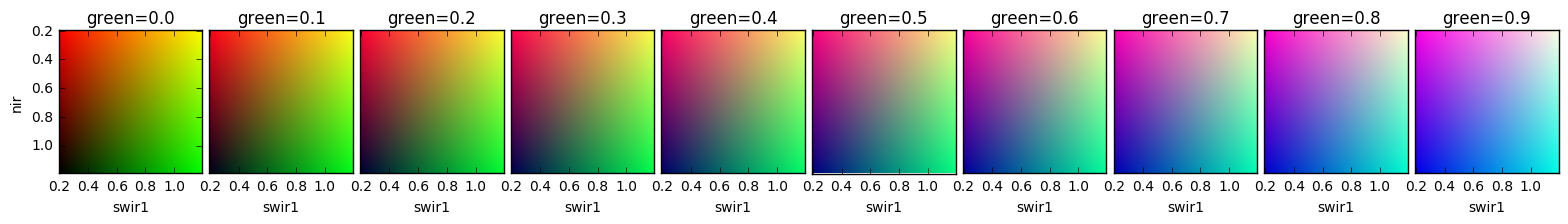

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


w, h = 100, 100
data = np.zeros((h, w, 3), dtype=np.uint8)
        
fig, ax = plt.subplots(1, 10, figsize=(15, 1.5))
fig.subplots_adjust(left=0.0, bottom=0.0, right=1, top=1, wspace=0.05)

labels = np.linspace(0, 1, num=6)


ax[0].set_xticklabels(labels)
ax[0].set_yticklabels(labels)
ax[0].set_xlabel('swir1')
ax[0].set_ylabel('nir')

majorLocator = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%.1f')

for a in ax[1:]:
    a.axes.get_yaxis().set_visible(False)
    a.axes.get_xaxis().set_major_locator(majorLocator)
    a.set_xticklabels(labels)
    a.set_xlabel('swir1')

for i, a in enumerate(ax):
    b = 0.1 * i
    
    for i, r in enumerate(np.linspace(1.0, 0.0, num=100)):
        for j, g in enumerate(np.linspace(0.0, 1.0, num=100)):
            data[i, j] = [r*255, g*255, b*255]
          
    a.set_title('green={:.1f}'.format(b))

    img = Image.fromarray(data, 'RGB')
    a.imshow(img)

    

In [80]:
from matplotlib.backends.backend_pdf import PdfPages

pdf = PdfPages(r'..\figures\spectral_info_scalebar_sng.pdf')
pdf.savefig(figure=fig, bbox_inches='tight', dpi=300)
pdf.close()

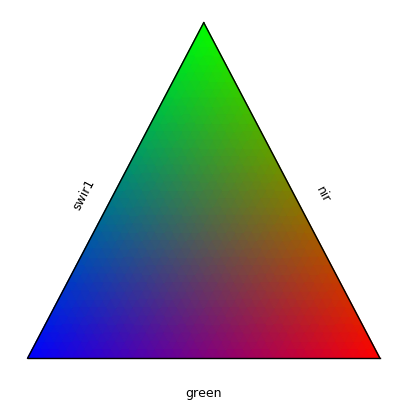

In [102]:
### import math
from matplotlib import pyplot
import ternary

def color_point(x, y, z, scale):
    r = x / float(scale)
    g = y / float(scale)
    b = z / float(scale)
    
    return (r, g, b, 1)

def generate_heatmap_data(scale=5):
    from ternary.helpers import simplex_iterator
    d = dict()
    for (i, j, k) in simplex_iterator(scale):
        d[(i, j, k)] = color_point(i, j, k, scale)
    return d

scale = 40
data = generate_heatmap_data(scale)
figure, tax = ternary.figure(scale=scale)

tax.get_axes().set_frame_on(False)

figure.set_size_inches(5, 5)

tax.heatmap(data, colormap=False) # Allow colors as rgba tuples

fontsize = 9
tax.left_axis_label("swir1", fontsize=fontsize, offset=0.1)
tax.right_axis_label("nir", fontsize=fontsize, offset=0.1)
tax.bottom_axis_label("green", fontsize=fontsize, offset=0.0)
tax.boundary()

# Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()

pyplot.show()
